In [ ]:
# install pymoo for NSGA II
!pip install pymoo

     |████████████████████████████████| 2.5 MB 32.3 MB/s 
     |████████████████████████████████| 239 kB 65.6 MB/s 


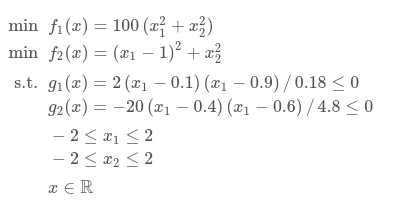

This is the Tutorial from https://pymoo.org/getting_started/preface.html

In [ ]:
# implement a problem
import numpy as np
from pymoo.core.problem import ElementwiseProblem # one of three possible ways to implement a problem. Means that the _evaluate function is called for each solution x at a time

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2, # number of objectives: min f_1 and f_2
                         n_constr=2, # number of constraints
                         xl=np.array([-2,-2]), # lower bound
                         xu=np.array([2,2])) # upper bound

    def _evaluate(self, x, out, *args, **kwargs): # function responsible for the evaluation
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2] # output is supposed to be written as dictionary. Should be written as list of numpy arrays of length of number of objectives
        out["G"] = [g1, g2] # should be written as list of numpy arrays of length of number of constraints


problem = MyProblem()

In [ ]:
# initialize the algorithm
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)
# termination criterion

from pymoo.factory import get_termination

termination = get_termination("n_gen", 40) # terminate after 40 iterations of the algorithm

In [ ]:
# Optimize

from pymoo.optimize import minimize

res = minimize(problem, 
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X # minimize returns result objects
F = res.F

# verbose = True provides some printouts. Each line represents one iteration. n_gen: Number of generation, n_eval: number of evaluations, 
# cv(min), cv(avg): min. constraint violation and avg. constraint violation
# n_nds: number of non-dominated solutions (our solutions!), eps, indicator: movement in the search space

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15486E+01 |       1 |  0.00000E+00 |            f
    3 |      60 |  0.00000E+00 |  5.277918607 |       1 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.406068542 |       2 |  1.000000000 |        ideal
    5 |      80 |  0.00000E+00 |  0.908316880 |       3 |  0.869706146 |        ideal
    6 |      90 |  0.00000E+00 |  0.264746300 |       3 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.054063822 |       4 |  0.023775686 |        ideal
    8 |     110 |  0.00000E+00 |  0.003060876 |       5 |  0.127815454 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |       6 |  0.085921728 |        ideal
   10 |     130 |  0.00000E+00 |  0.00000E+00 |       7 |  0.015715204 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |       

In [ ]:
# Visualize Solutions
import matplotlib.pyplot as plt

xl, xu = problem.bounds() # values from problem-class
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()



In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Decision Making Process

In [ ]:
# We have obtained 40 Solutions. How can we choose a set of solutions or, if possible, the best solution?
# => Multi-Criteria Decision Making (decision making process for multi-objective problems)


# pareto-optimal solutions obtained from the optimization procedure are given by
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

# Random Forest + NSGAII: Find out optimal max_depth

In [ ]:
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
import sklearn.ensemble


# Use Sklearn Dataset
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y,random_state=1)

print(X_train.shape, X_test.shape) # y is binary: 0 or 1

rfc = sklearn.ensemble.RandomForestRegressor(max_depth = 29, random_state = 0)
rfc.fit(X_train, y_train)
print(sklearn.metrics.mean_squared_error(y_test, rfc.predict(X_test)))


In [ ]:
# implement a problem
import numpy as np
from pymoo.core.problem import ElementwiseProblem # one of three possible ways to implement a problem. Means that the _evaluate function is called for each solution x at a time

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=1, # number of objectives: min f_1 and f_2
                         n_constr=0, # number of constraints
                         xl=np.array([1, 1]), # lower bound
                         xu=np.array([300, 29])) # upper bound

    def _evaluate(self, x, out, *args, **kwargs):
        rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = x[0], max_depth = x[1], random_state = 0)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        #mse = sklearn.metrics.mean_squared_error(y_test, y_pred) #randomforestregressor.score is R^2 value. Which want to we want to minimize?
        score = 1-rfc.score(X_test, y_test)

        out["F"] = [score] # output is supposed to be written as dictionary. Should be written as list of numpy arrays of length of number of objectives

problem = MyProblem()

In [ ]:
# initialize the algorithm. pymoo was mainly made for continious problems. but it's possible to use it for discrete variables too
algorithm = NSGA2(
    pop_size=500,
    n_offsprings=40,
    sampling=get_sampling("int_random"),
    crossover=get_crossover("int_sbx"),
    mutation=get_mutation("int_pm"),
    eliminate_duplicates=True
)
# termination criterion

from pymoo.factory import get_termination

termination = get_termination("n_gen", 200) # terminate after 40 iterations of the algorithm

In [ ]:
import time
start_time = time.time()
res = minimize(problem, 
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)
end_time = time.time()

print("Time: ", (end_time-start_time)/60, "min")

X_ = res.X # minimize returns result objects
F_ = res.F

In [ ]:
# Visualize Solutions
import matplotlib.pyplot as plt

xl, xu = problem.bounds() # values from problem-class
plt.figure(figsize=(7, 5))
plt.scatter(X_[:, 0], X_[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()


In [ ]:
# test solutions
rfc_list = []
for i in range(X_.shape[0]):
  rfc = sklearn.ensemble.RandomForestRegressor(n_estimators = X_[i][0], max_depth = X_[i][1], random_state = 0)
  rfc.fit(X_train, y_train)
  #print(sklearn.metrics.mean_squared_error(y_test, rfc.predict(X_test)))
  print(rfc.score(X_test, y_test))
  rfc_list.append(rfc.score(X_test, y_test))
print("Position: ", rfc_list.index(max(rfc_list)), "Value; ", max(rfc_list), "Parameters:", X_[rfc_list.index(max(rfc_list)),:])

In [ ]:
rfc = sklearn.ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 0)
rfc.fit(X_train, y_train)
#print(sklearn.metrics.mean_squared_error(y_test, rfc.predict(X_test)))
rfc.score(X_test, y_test)
